### References -

- https://botlnec.github.io/islp/sols/chapter3/exercise8/

#### Exercises

<img src="../images/3.1.jpg">

In [181]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from pandas.tools.plotting import scatter_matrix 
from collections import defaultdict

from IPython.display import Image
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

%matplotlib inline
plt.style.use('ggplot') # emulate pretty r-style plots

### Question 1.

#### Table 3.4

In [2]:
advertising_df = pd.read_csv("../data/Advertising.csv", usecols=[1,2,3,4])
advertising_df.head(2)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4


In [3]:
formula = "Sales ~ + TV + Radio + Newspaper"
model = smf.OLS.from_formula(formula, advertising_df)

result = model.fit()
result.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


- The t-statistics computed on Table 3.4 are computed individually for each coefficient since they are independent variables. Accordingly, there are 4 null hypotheses that we are testing:

    - $H_0$ : for "TV": in the presence of Radio and Newspaper ads (and in addition to the intercept), there is no relationship between TV and Sales;
    
    - $H_0$ : for "Radio": in the presence of TV and Newspaper ads (and in addition to the intercept), there is no relationship between Radio and Sales;
    
    - $H_0$ : for "Newspaper": in the presence of TV and Radio ads (and in addition to the intercept), there is no relationship between Newspaper and Sales;
    
    - $H_0$ : for the intercept: in the absence of TV, Radio and Newspaper ads, Sales are zero;
    
 versus the 4 corresponding alternative hypotheses:
    

   - $H_a$ : There is some relationship between TV/Radio/Newspaper and Sales, or Sales are non-zero in the absence of the other variables.



Mathematically, this can be written as

 $H_0$: $β_i$=0, for i=0,1,2,3,

versus the 4 corresponding alternative hypotheses

$H_a$: $β_i$≠0, for i=0,1,2,3.

As can been seen on Table 3.4, for all the variables the p-value is practically zero, except for Newspaper for which it is very high, namely .86, much larger than the typical confidence levels, 0.05, 0.01 and 0.001. Given the t-statistics and the p-values we can reject the null hypothesis for the intercept, TV and Radio, but not for Newspaper.

This means that we can conclude that there is a relationship between TV and Sales, and between Radio and Sales. Also rejecting β0=0, allows us to conclude that in the absence of TV, Radio and Newspaper, Sales are non-zero. Not being able to reject the null hypothesis $β_Newspaper$=0, suggests that there is indeed no relationship between Newspaper and Sales, in the presence of TV and Radio.

Additional comment
At a 5% p-value, there would be a 19% chance of having one appear as significant out of 3 variables, even if there was no relationship for all of them.

$(1−.95^4)$ = 19%


- Further Reading

    - https://www.coursera.org/lecture/regression-modeling-practice/python-lesson-1-multiple-regression-xQRab

### Question 2

- Both models share a similar principle: the output values are computed based on their K closest points (nearest neighbours) value.


- The <b>KNN classifier</b> starts by identifying the K nearest neighbours. Then, the output of each K observation is considered and, by majority vote, we determine the label of our observation. Example: if we are trying to classify an observation as 'blue' or 'red', and in the K nearest neighbours we have two of them classified as 'blue' and one as 'red', our observation will be classified as 'blue'. Notice that if we have a tie, a common solution is to increase or decrease K.


- Regarding the <b>KNN regression method</b>, it also starts by identifying the K nearest neighbours. However, in this situation, we compute our output averaging the output of the K nearest neighbours. Example: if our K nearest neighbours have as output the values 3,4 and 5, our output will be (3+4+5)/3 = 4.

### Question 3

#### a) 

\begin{equation}\label{eq:}
Y = \beta_0 + \beta_1 \times GPA + \beta_2 \times IQ + \beta_3 \times Gender + \beta_4 \times GPA \times IQ + \beta_5 \times GPA \times Gender
\end{equation}

For a fixed value of GPA and IQ, the difference between female and male is given by:

\begin{equation*}
Y_{female} - Y_{male} = \beta_3 + \beta_5 \times GPA = 35 - 10 GPA
\end{equation*}


which depends on GPA. It is clear that in the normal range of the GPA (0 to 4.0), the difference in expected salary between female and male ranges linearly from 35 to -5. In particular, if GPA > 3.5, males earn on average more than females. Therefore, the correct answer is (iii).



#### b)

The predicted salary is 137.1 (thousand dollars). Given the coefficients from the fit, GPA = 4.0, IQ = 110 and Gender = 1, the model predicts:

\begin{equation*}
Y = \beta_0 + \beta_1 GPA + \beta_2 IQ + \beta_3 Gender + \beta_4 (GPA \times IQ) + \beta_5 (GPA \times Gender)
\end{equation*}

\begin{equation*}
Y = 50 + 20 \times 4.0 + 0.07 \times 110 + 35 \times 1  + 0.01 \times 4.0 \times 110 + (-10) \times 4.0 \times 1 = 137.1
\end{equation*}


#### c)


False. Although the coefficient for the GPA/IQ interaction term is very small, specially when compared to the other coefficients, this does not indicate whether there is an interaction effect. First, this coefficient is multiplied by the product of IQ and GPA which ranges from 0 to a few hundred, so that the contribution to the response would tipically add up to a value between 2 and 6, let's say. Secondly, and more importantly, evidence for the interaction effect has to be evaluated with a t-statistic or an F-statistic for a null hypothesis ($H_0$:$β_4$=0), yielding a certain p-value. This requires the standard error of which we have no information, and therefore cannot conclude whether there is evidence for a interaction effect.



### Question 4

<img src="../images/3.4.jpg">

(a) Cubic regression will have lower Residual Sum of Squares (RSS). The cubic regression model is more flexible than the linear regression model. Accordingly, the cubic regression model can fit the data better and achieve a lower training RSS than the linear regression model.

(b) Linear regression will have lower RSS. In general, more flexible models have less bias and higher variance. By contrast, more rigid models have high bias and lower variance. Since it is said that true relationship between the predictor and the response is linear, we know that, in this case, the linear regression model will have low bias. Consequently, this model will perform better than the cubic regression model, which is expected to have higher variance.

(c) Cubic regression will have lower RSS. Same reason as in (a). Since the model is more flexible, it is able to fit the data better.

(d) Not enough information to tell. Due to its flexibility, it is generally expected that the cubic regression model has lower bias and higher variance than the linear regression model. In this exercise, we know that the true relationship is non-linear, but we don't know how far it is from linear. This means that we don't have any idea about how high the bias of the linear regression model can be. If the model is just slightly non-linear, the linear regression will be able to model the data and achieve low bias. Thus, we would expect the linear model to have low bias and low variance. This could be enough (or not) to beat the cubic regression model, which is expected to have low bias and high variance. However, if the true relationship is substantially non-linear, the linear model will not be able to model the data and its bias will be high. With high bias and low variance, the linear regression model is beaten by a cubic model without overfitting problems. It will always depend on the bias-variance trade-off and, in general, on the size of the training set and the magnitude of the noise. We would need more information to know which model would have lower RSS.

### Question 5

<img src="../images/3.5.jpg">

#### Answer - 5)


Combining the first equation $\hat{y_i} = x_i\hat{\beta}$ with (3.38) we get $$\hat{y_i} = \frac{x_i\sum\limits_{k=1}^n x_k y_k}{\sum\limits_{j=1}^nx_j^2}$$

The $x_i$ outside of the summation is a constant and be distributed inside the summation. $$\hat{y_i} = \sum\limits_{k=1}^n (\frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2})y_k$$

$a_i$ is everything between the parentheses. $$a_i = \frac{x_i x_k}{\sum\limits_{j=1}^nx_j^2}$$

#### Answer 6)

<img src="../images/3.6_ans.jpg">

#### Answer 7)

<img src="../images/3.7_ans.jpg">

### Applied

### Exercise 3.8

<img src="../images/3.8.jpg">

In [4]:
auto_df = pd.read_csv("../data/Auto.csv", na_values="?")
auto_df = auto_df.dropna() # drop rows with na values

print(len(auto_df.mpg),'rows')
auto_df.head()

392 rows


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [5]:
formula = "mpg ~ horsepower"
model = smf.ols(formula, data= auto_df)

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           7.03e-81
Time:                        18:46:38   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Describe Predictor/Response Relationship

#### (i) There is a negative relationship between horsepower and miles/gallon
#### (ii) The relationship between hp and mpg is strong (p-value ~ 0)
#### (iii) Negative slope term
#### (iv) At 98 hp the predicted mpg is ~ 24.5 mpg

In [6]:
#### Prediction with confidence interval
def predict(res, new):
    
    # get predicted values
    fit = pd.DataFrame(res.predict(new), columns=["fit"])
    
    # get the confidence interval for the model coefficients
    ci = res.conf_int().rename(columns = {0: 'lower', 1: 'upper'})
    
    # calculate CI for new data prediction
    ci = ci.T.dot(new.T).T
    
    df = pd.concat([fit, ci], axis = 1)
    
    return df

In [7]:
new = pd.DataFrame([[1, 98]], columns=["Intercept", "horsepower"])
predict(result, new)

,fit,lower,upper
0,24.467077,21.814545,27.119609


## Plot Data and Estimate

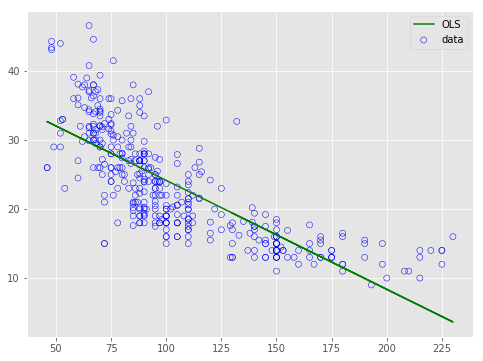

In [8]:
# plot the data and the estimate
fig,ax = plt.subplots(figsize=(8,6))

# scatter data
ax.scatter(auto_df["horsepower"].values, auto_df["mpg"].values, facecolors='none', edgecolors='b', label="data")

# plot estimate
ax.plot(auto_df["horsepower"].values, result.fittedvalues, 'g', label="OLS")
ax.legend(loc='best');

## Perform Estimate Diagnostics

#### Plot the residuals, studentized residuals and the leverages.

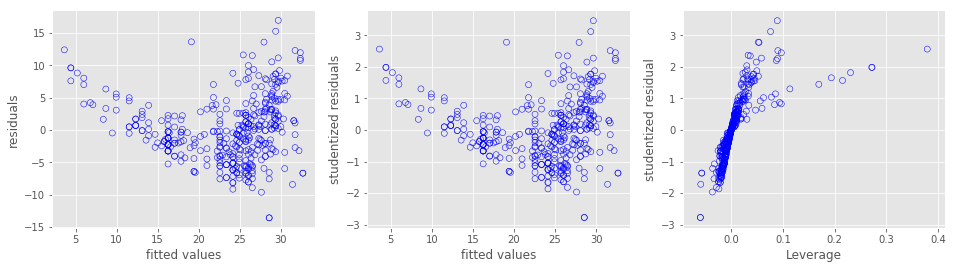

In [9]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = result.fittedvalues
residuals = result.resid.values
studentized_residuals = OLSInfluence(result).resid_studentized_internal
leverages = OLSInfluence(result).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');

# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');

# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');

- The residuals show a clear U-shape indicating a poor fit at the extremes of the fitted data. 


- The studentized residuals show two outliers (>3) and the leverage plot has several values >> (p+1)/n=.005 indicating high leverages which are altering the regression estimate.


- A quadratic fit (mpg~horsepower**2) is clearly more appropriate.

### Exercise 3.9

<img src="../images/3.9.jpg">


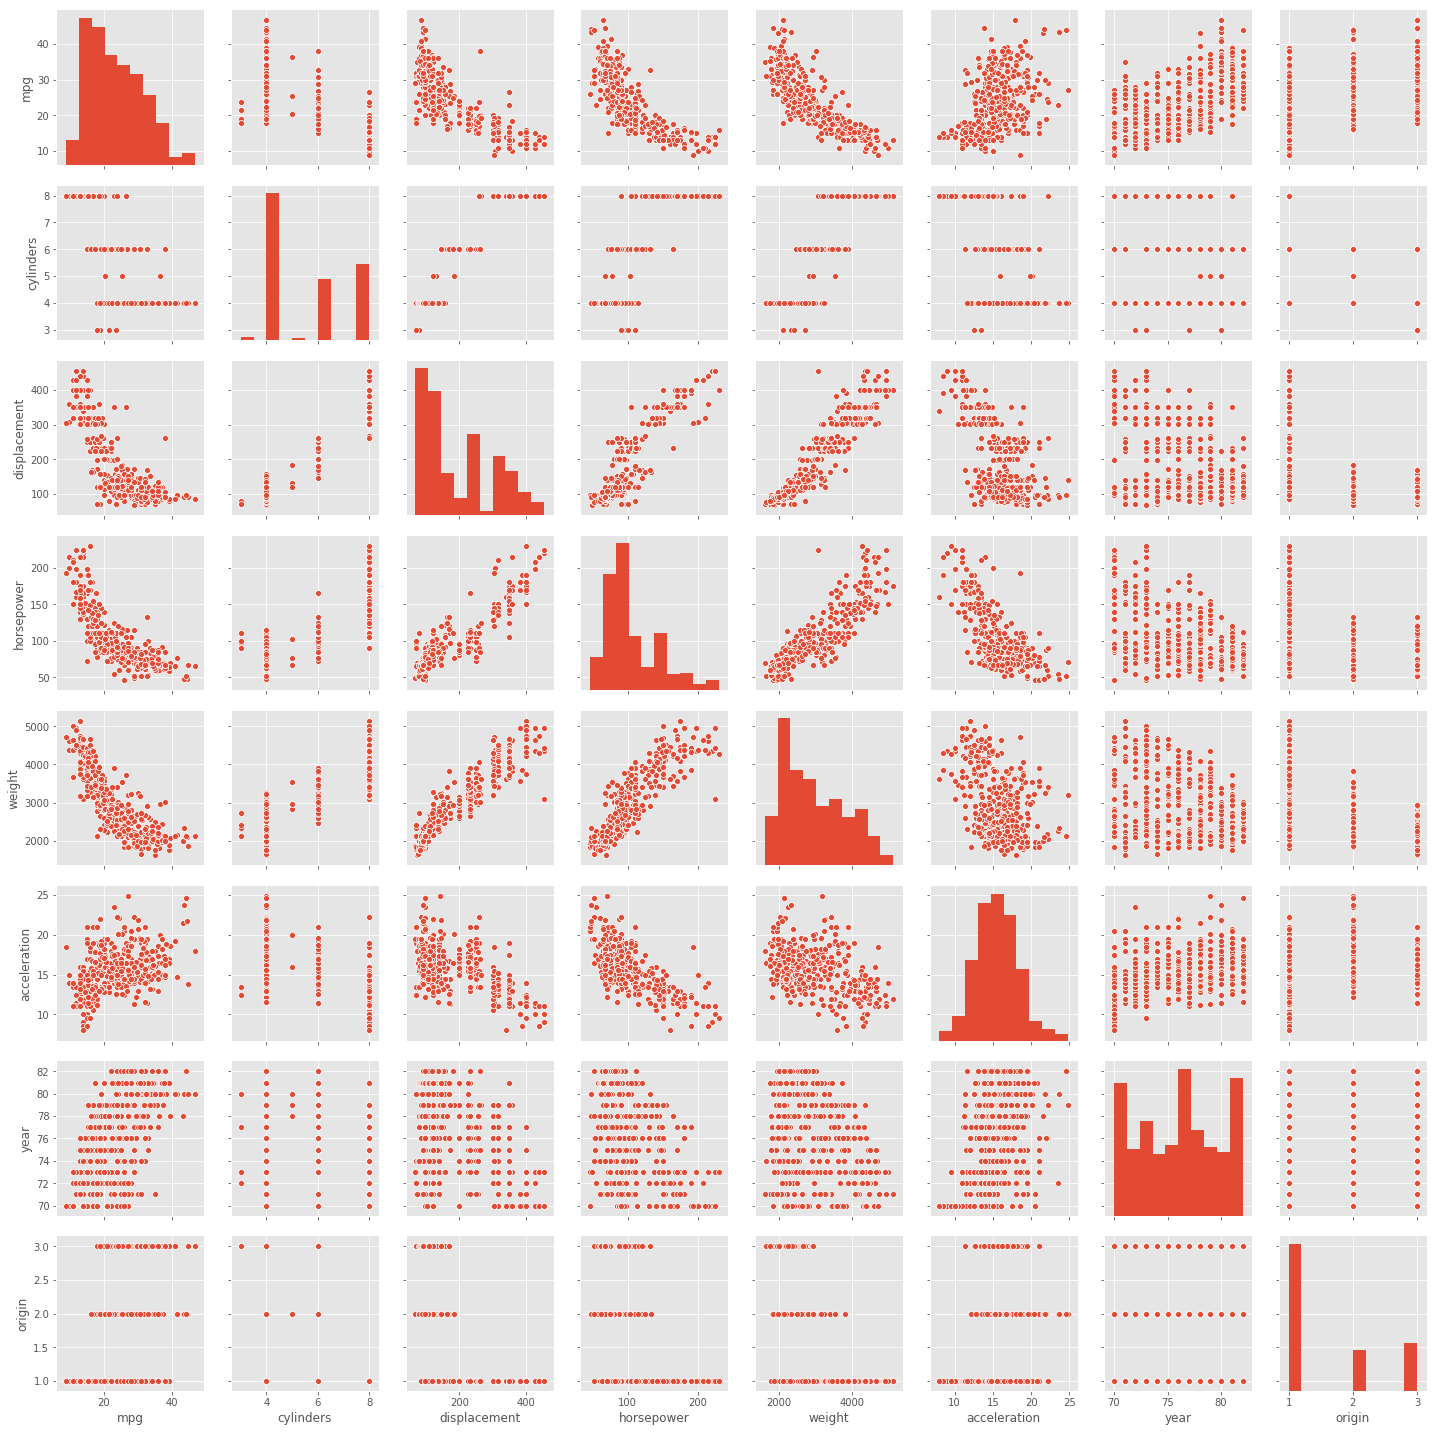

In [10]:
sns.pairplot(auto_df)
plt.show()

In [11]:
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [12]:
formula = 'mpg ~ ' + " + ".join(auto_df.columns[1:-1])
formula

'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

In [13]:
model = smf.ols(formula, auto_df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          2.04e-139
Time:                        18:46:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i) There is a clear relationship between predictor and response. F-stat is very high.  


ii) displacement, weight, year, origin are statistically significant    


iii) Its positive, so the higher the year the more the mpg    

#### Note that the correlation between displacement, horsepower and weight is high indicating a collinearity problem. The coeffecients for theses variables are therefore suspect. Below we compute the variance inflation factors, cylinders, displacement, horsepower and weight have larger VIF's which again indicate multi-collinearity.

In [14]:
# Compute all the variance inflation factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIFs = [(predictor, variance_inflation_factor(auto_df.iloc[:,1:-1].values,_)) \
        for _,predictor in enumerate(list(auto_df.iloc[:,1:-1]))] # list(X) returns column names of df

print('Variance Inflation Factors')
for tup in VIFs:
    print('{:20}'.format(tup[0]), '{:.3f}'.format(tup[1]))

Variance Inflation Factors
cylinders            117.709
displacement         96.910
horsepower           67.072
weight               139.454
acceleration         69.700
year                 115.795
origin               8.470


## Perform Estimate Diagnostics

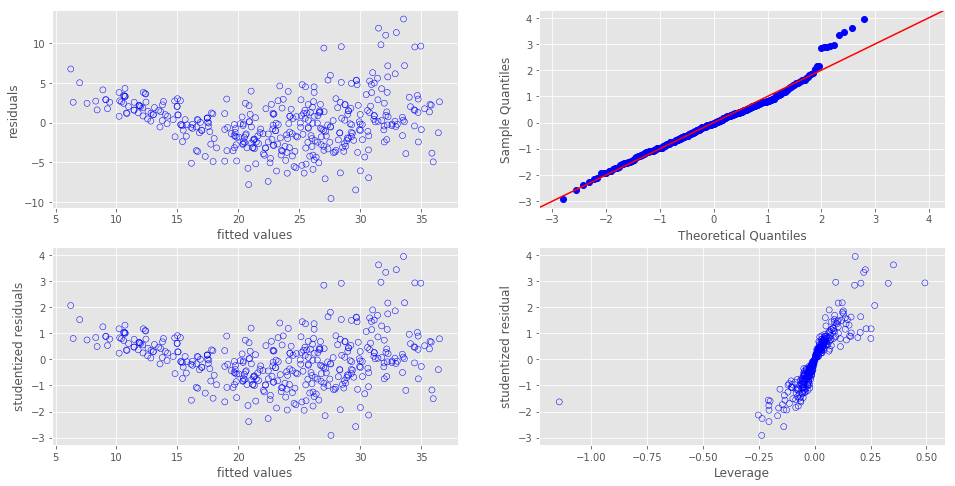

In [15]:
# Obtain the residuals, studentized residuals and the leverages
fitted_values = results.fittedvalues
residuals = results.resid.values
studentized_residuals = OLSInfluence(results).resid_studentized_internal
leverages = OLSInfluence(results).influence

# Plot
fig, ax = plt.subplots(2, 2, figsize=(16,8))

# Residuals
ax[0, 0].scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax[0, 0].set_xlabel('fitted values');
ax[0, 0].set_ylabel('residuals');

sm.graphics.qqplot(results.resid / np.sqrt((results.resid ** 2).sum() / 390), line='45', ax=ax[0, 1])

# Studentized Residuals
ax[1, 0].scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax[1, 0].set_xlabel('fitted values');
ax[1, 0].set_ylabel('studentized residuals');

# Leverages
ax[1, 1].scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax[1, 1].set_xlabel('Leverage');
ax[1, 1].set_ylabel('studentized residual');



#### The residuals plot indicates non-linearity in the data. The U-Shape means the fit is worse at the extreme values of the fit. The studentized residuals show multiple points are outliers ( > 3). The leverage plot shows several high leverage points. These are points that have leverages >> (p+1)/n= 8/392 ~ 0.02  Several of these points are also outliers. These points therefore strongly alter the coeffecient estimates.

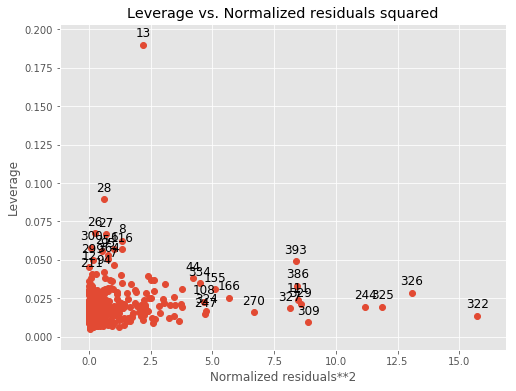

In [16]:
# point 13 has unusually large leverage
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

## Fit a Model with Interaction Effects

In [17]:
from itertools import combinations

In [18]:
interactions_formula =  " + ".join([comb[0] + " * " + comb[1] for comb in combinations(auto_df.columns[1:-1], 2)])
interactions_formula

'cylinders * displacement + cylinders * horsepower + cylinders * weight + cylinders * acceleration + cylinders * year + cylinders * origin + displacement * horsepower + displacement * weight + displacement * acceleration + displacement * year + displacement * origin + horsepower * weight + horsepower * acceleration + horsepower * year + horsepower * origin + weight * acceleration + weight * year + weight * origin + acceleration * year + acceleration * origin + year * origin'

In [19]:
formula = 'mpg ~ ' + " + ".join(auto_df.columns[1:-1])
formula += ' + ' + interactions_formula

In [20]:
results = smf.ols(formula, data=auto_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     104.2
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          4.01e-155
Time:                        18:47:01   Log-Likelihood:                -929.72
No. Observations:                 392   AIC:                             1917.
Df Residuals:                     363   BIC:                             2033.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    35.4789     53.136      0.668      0.505     -69.014     139.972
cylinders                     6.9886      8.248      0.847      0.397      -9.231      23.208
displacement                 -0.4785      0.189     -2.527      0.012      -0.851      -0.106
horsepower                    0.5034      0.347      1.451      0.148      -0.179       1.186
weight                        0.0041      0.018      0.235      0.814      -0.030       0.039
acceleration                 -5.8592      2.174     -2.696      0.007     -10.134      -1.585
year                          0.6974      0.610      1.144      0.253      -0.501       1.896
origin                      -20.8956      7.097     -2.944      0.003     -34.852      -6.939
cylinders:displacement       -0.0034      0.006     -0.524      0.601      -0.016       0.009
cylinders:horsepower          0.0116      0.024      0.480      0.632      -0.036       0.059
cylinders:weight              0.0004      0.001      0.399      0.690      -0.001       0.002
cylinders:acceleration        0.2779      0.166      1.670      0.096      -0.049       0.605
cylinders:year               -0.1741      0.097     -1.793      0.074      -0.365       0.017
cylinders:origin              0.4022      0.493      0.816      0.415      -0.567       1.371
displacement:horsepower   -8.491e-05      0.000     -0.294      0.769      -0.001       0.000
displacement:weight        2.472e-05   1.47e-05      1.682      0.093   -4.18e-06    5.36e-05
displacement:acceleration    -0.0035      0.003     -1.041      0.299      -0.010       0.003
displacement:year             0.0059      0.002      2.482      0.014       0.001       0.011
displacement:origin           0.0240      0.019      1.232      0.219      -0.014       0.062
horsepower:weight         -1.968e-05   2.92e-05     -0.673      0.501   -7.72e-05    3.78e-05
horsepower:acceleration      -0.0072      0.004     -1.939      0.053      -0.015       0.000
horsepower:year              -0.0058      0.004     -1.482      0.139      -0.014       0.002
horsepower:origin             0.0022      0.029      0.076      0.939      -0.055       0.060
weight:acceleration           0.0002      0.000      1.025      0.306      -0.000       0.001
weight:year                  -0.0002      0.000     -1.056      0.292      -0.001       0.000
weight:origin                -0.0006      0.002     -0.364      0.716      -0.004       0.003
acceleration:year             0.0556      0.026      2.174      0.030       0.005       0.106
acceleration:origin           0.4583      0.157      2.926      0.004       0.150       0.766
year:origin                   0.1393      0.074      1.882      0.061      -0.006       0.285
===========================================================================

## Transform Variables

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     286.4
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           5.60e-98
Time:                        18:47:02   Log-Likelihood:                -1132.4
No. Observations:                 392   AIC:                             2273.
Df Residuals:                     388   BIC:                             2289.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

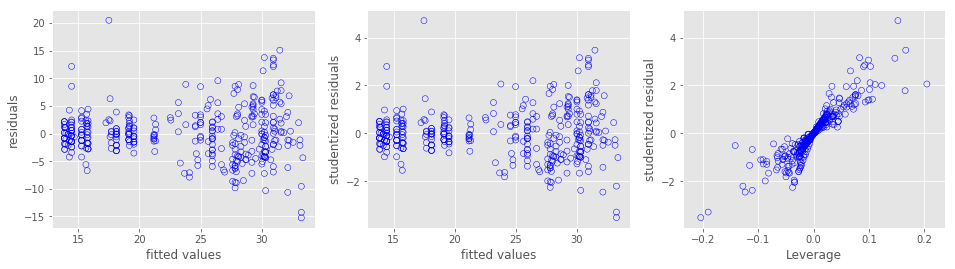

In [21]:
# Construct model estimate and summarize
quadratic_estimate = smf.ols('mpg ~ displacement + origin + np.power(displacement, 2)', data=auto_df).fit()
quadratic_estimate.summary()

print(quadratic_estimate.summary())

# Diagnostic Plots

# Obtain the residuals, studentized residuals and the leverages
fitted_values = quadratic_estimate.fittedvalues
residuals = quadratic_estimate.resid.values
studentized_residuals = OLSInfluence(quadratic_estimate).resid_studentized_internal
leverages = OLSInfluence(quadratic_estimate).influence

# Plot
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,4))

# Residuals
ax1.scatter(fitted_values, residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');

# Studentized Residuals
ax2.scatter(fitted_values, studentized_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('fitted values');
ax2.set_ylabel('studentized residuals');

# Leverages
ax3.scatter(leverages, studentized_residuals, facecolors='none', edgecolors='b');
ax3.set_xlabel('Leverage');
ax3.set_ylabel('studentized residual');


In [22]:
# R-squared increases a bit more with log-log-horsepower
results = smf.ols('mpg ~ np.log(np.log((horsepower)))', data=auto_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     805.5
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           6.67e-97
Time:                        18:47:04   Log-Likelihood:                -1141.6
No. Observations:                 392   AIC:                             2287.
Df Residuals:                     390   BIC:                             2295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      154.6842      4.629     33.413      0.000     145.582     163.786
np.log(np.log((horsepower)))   -86.3031      3.041    -28.382      0.000     -92.281     -80.325
==============================================================================
Omnibus:                       13.057   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.364
Skew:                           0.233   Prob(JB):                     3.78e-05
Kurtosis:                       4.014   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 3.10

<img src="../images/3.10.jpg">


In [23]:
carseats = pd.read_csv('../data/carseats.csv')
carseats = carseats.drop("Unnamed: 0", axis=1)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [24]:
results = smf.ols('Sales ~ Price + Urban + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.39e-23
Time:                        18:48:31   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only US and Price are statistically significant in our model. There is no difference whether someone is living in an urban area or not. Living in the US adds 1.2 to Sales up from 13 for outside of US. For every 1 unit increase in Price a corresponding .05 decrease in sales is seen.

# equations
Ignoring Urban because its not significant.
* In US: $Sales = 14.24 - .055 * Price$
* Not in US: $Sales = 13.04 - .055 * Price$

d) Reject null for US and Price

In [25]:
# e) smaller model without urban
results = smf.ols('Sales ~ Price + US', data=carseats).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.66e-24
Time:                        18:48:33   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f) Since urban is nearly completely random, there is almost no difference in the two models above. R-squared is low so lots of variance remains in the model  
g) See table

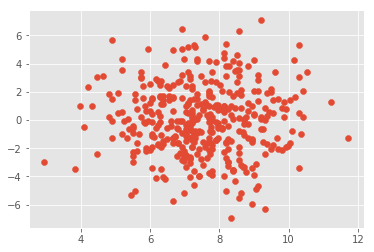

In [26]:
# Doesn't appear to be outliers
plt.scatter(results.fittedvalues, results.resid);

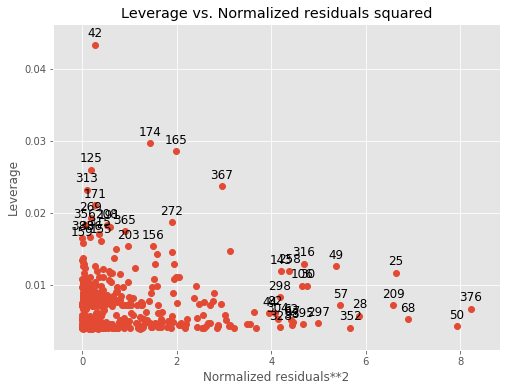

In [27]:
# a few high leverage points above .025
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(results, ax = ax)

### Exercise 3.11

<img src="../images/3.11.jpg">


### Generate Data

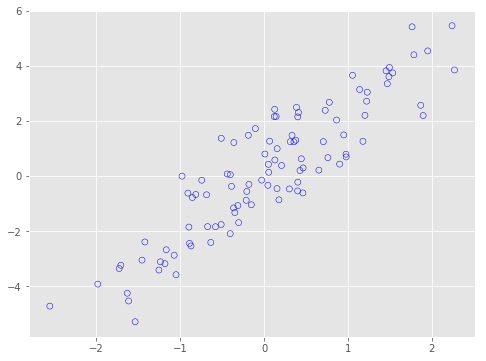

In [34]:
#### seed to reproduce data
np.random.seed(0)

#### random 100 values
x = np.random.randn(100)

### Calculate y
y = 2 * x + np.random.randn(100)

#### Plot x,y scatter plot
fig, ax = plt.subplots(figsize = (8, 6))
ax.scatter(x, y, facecolor = "None", edgecolor = "b")

plt.show()

### Regress y onto x without intercept

In [42]:
model = sm.OLS(y, x)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     426.4
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.16e-37
Time:                        19:00:02   Log-Likelihood:                -144.94
No. Observations:                 100   AIC:                             291.9
Df Residuals:                      99   BIC:                             294.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1191      0.103     20.650      0.000       1.915       2.323
==============================================================================
Omnibus:                        5.116   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                2.979
Skew:                           0.209   Prob(JB):                        0.226
Kurtosis:                       2.265   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### The slope (coeffecient) for the x predictor without an intercept is 2.1191	. This slope has a high t-statistic and low p-value (i.e. significant), which is expected since we know the form ${Y=2X+\epsilon}$

### Regress x onto y without intercept

In [43]:
model = sm.OLS(x, y)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     426.4
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.16e-37
Time:                        19:00:04   Log-Likelihood:                -59.401
No. Observations:                 100   AIC:                             120.8
Df Residuals:                      99   BIC:                             123.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3830      0.019     20.650      0.000       0.346       0.420
==============================================================================
Omnibus:                        0.557   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.687
Skew:                          -0.072   Prob(JB):                        0.709
Kurtosis:                       2.620   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpret Regression Coeffecients

#### When we regress y onto x,  ${\beta}$ is the slope term of the x predictor. We know the true ${\beta=2}$, thus we get a coeffecient close to 2. Given that this captures all the variance except the irreducible data var ${var(\epsilon)}$ the standard error is low and the coeffecient is highly significant. 

#### When we regress x onto y, we are inverting the equation to read ${X=Y\left(\frac{1-\epsilon}{\beta}\right)}$. Thus we get a coeffecient that is close to the inverse slope ${1/\beta}$. Notice that the standard error is lower because the random variable ${\epsilon}$ is being divided by the coeffecient ${\beta}$. 

#### Importantly, the t-statistic and p-value remain unchanged. We have shown this numerically and will now show it algebraically.

#### Given ${t = \frac{\beta}{SE\left(\beta\right)}}$   and   ${SE\left(\beta\right)}=\sqrt{\frac{\sum{\left(y_i-\beta x_i\right)^2}}{\left(n-1\right)\sum{x_i^2}}}$   and   $\beta=\frac{\sum{x_i y_i}}{\sum{x_i^2}}$ by 3.38

#### Show the t-statistic can be written as ${\frac{\sqrt{n-1}\sum_{i=1}^n{x_iy_i}}{\sqrt{\sum{x_i^2}*\sum_{i'=1}^{n}{y_{i'}^2}-\sum_{i=1}^{n}{\left(x_i*y_i\right)^2}}}}$
#### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


#### Substituting ${\beta}$ into $t$ we get: ${t=\frac{\sqrt{n-1} \sum{x_i y_i}}{\sqrt{\sum{x_i^2}}\sqrt{\sum{y_i^2-2 \sum{ y_i x_i \frac{\sum{x_i y_i}}{\sum{x_i^2}}}+\sum{\left(\frac{\sum{x_i y_i}}{\sum{x_i^2}}\right)^2 x_i^2}}}}}$


#### The denominator can be simplified by distributing $\sqrt{\sum{x_i^2}}$ and by pulling the mini-sums out of the larger sums (they are constants) to get: 

${t=\frac{\sqrt{n-1} \sum{x_i y_i}}{{\sum{x_i^2}\sum{y_i^2}-\sum{\left(x_i y_i\right)^2}}}}$ 

#### *Notice that we can switch x, y with each other and get the exact same t-statistic. This is why the t-statistic and the p-value for the regression of y onto x and x onto y are the same.*

### Regress x onto y with intercept

In [45]:
results = sm.OLS(x, sm.add_constant(y)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.1
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.96e-37
Time:                        19:10:55   Log-Likelihood:                -59.321
No. Observations:                 100   AIC:                             122.6
Df Residuals:                      98   BIC:                             127.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0175      0.044     -0.395      0.694      -0.106       0.071
x1             0.3836      0.019     20.521      0.000       0.347       0.421
==============================================================================
Omnibus:                        0.571   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.698
Skew:                          -0.073   Prob(JB):                        0.706
Kurtosis:                       2.618   Cond. No.                         2.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Regress x onto y with intercept

In [46]:
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.1
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.96e-37
Time:                        19:11:02   Log-Likelihood:                -144.67
No. Observations:                 100   AIC:                             293.3
Df Residuals:                      98   BIC:                             298.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0752      0.104      0.722      0.472      -0.131       0.282
x1             2.1147      0.103     20.521      0.000       1.910       2.319
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.000
Skew:                           0.210   Prob(JB):                        0.223
Kurtosis:                       2.262   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 3.12

<img src="../images/3.12.jpg">


#### (a) The coeffecient of regression for y~x and x~y will be the same if the denominator of $\beta=\frac{\sum{x_i y_i}}{\sum{x_i^2}}$ is equal (i.e.) $\sum{x_i^2} = \sum{y_i^2}$.

#### b) Its very difficult to get the exact same coefficients. Any random pairing will do

In [48]:
# b
np.random.seed(1)
x = np.random.randn(100)
y = x + np.random.randn(100) / 100

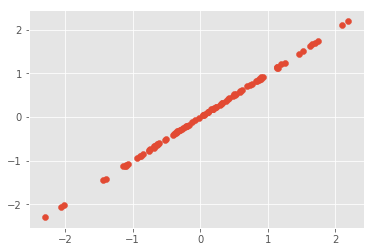

In [50]:
# very close to a perfect line
plt.scatter(x, y)
plt.show()

In [51]:
np.corrcoef(x, y)

array([[1.        , 0.99994513],
       [0.99994513, 1.        ]])

In [52]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.845e+05
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          2.11e-197
Time:                        19:19:40   Log-Likelihood:                 324.85
No. Observations:                 100   AIC:                            -647.7
Df Residuals:                      99   BIC:                            -645.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0011      0.001    940.454      0.000       0.999       1.003
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# coefficients are just a little different
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.845e+05
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          2.11e-197
Time:                        19:19:41   Log-Likelihood:                 324.96
No. Observations:                 100   AIC:                            -647.9
Df Residuals:                      99   BIC:                            -645.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9988      0.001    940.454      0.000       0.997       1.001
==============================================================================
Omnibus:                        0.862   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.547
Skew:                           0.173   Prob(JB):                        0.761
Kurtosis:                       3.110   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####  c) if x and y are the exact same (but in a different order) the coefficients for the model should be the same

In [54]:
# c) if x and y are the exact same (but in a different order) the coefficients for the model should be the same
x = np.random.randn(100) * 5
y = x.copy()
np.random.shuffle(y)

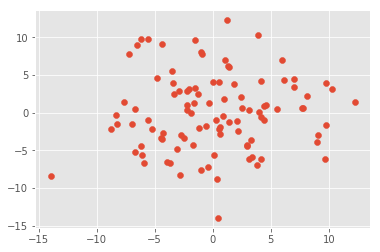

In [55]:
# perf
plt.scatter(x, y);

In [56]:
results = sm.OLS(x, y).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2926
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.590
Time:                        19:20:11   Log-Likelihood:                -303.19
No. Observations:                 100   AIC:                             608.4
Df Residuals:                      99   BIC:                             611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0543      0.100      0.541      0.590      -0.145       0.253
==============================================================================
Omnibus:                        0.535   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.765   Jarque-Bera (JB):                0.678
Skew:                           0.141   Prob(JB):                        0.713
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
# Same coefficient!
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2926
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.590
Time:                        19:20:14   Log-Likelihood:                -303.19
No. Observations:                 100   AIC:                             608.4
Df Residuals:                      99   BIC:                             611.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0543      0.100      0.541      0.590      -0.145       0.253
==============================================================================
Omnibus:                        0.511   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.587
Skew:                           0.163   Prob(JB):                        0.746
Kurtosis:                       2.814   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Exercise 3.13

<img src="../images/3.13.jpg">
<img src="../images/3.13.1.jpg">

In [134]:
#### set seed
np.random.seed(0)

x = np.random.randn(100)

In [135]:
eps = 0.25 * np.random.randn(100)

In [136]:
y = -1 + 0.5 * x + eps
print("y has",len(y),'elements and the population regression line parameters are [beta0,beta1] = [-1,0.5]')

y has 100 elements and the population regression line parameters are [beta0,beta1] = [-1,0.5]


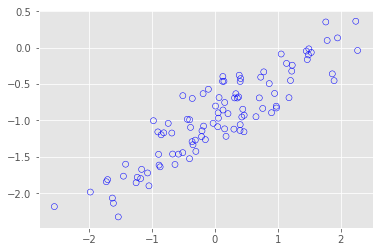

In [138]:
#### (d) Scatter Plot
plt.scatter(x, y, facecolor = "None", edgecolor = "b")

plt.show()

#### The relationship between X and Y is linear

In [149]:
#### e) Fit least squares model to predict y using x
X_new = sm.add_constant(x)
model = sm.OLS(y, X_new)

result = model.fit()

print("\nThe RSE is ", (result.ssr/(len(x)-X_new.shape[1]-1))**0.5)
result.summary()

#### Beta_hat and Beta1_hat are note exactly same as Beta and Beta1 - 
#### Reason - the relationship betweenx and y is not exactly linear, there is some irreducible error 
#### in the model which can not be fit into the least quare model


The RSE is  0.26099184504958367


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.1
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.96e-37
Time:                        21:09:46   Log-Likelihood:                -6.0443
No. Observations:                 100   AIC:                             16.09
Df Residuals:                      98   BIC:                             21.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9812      0.026    -37.722      0.000      -1.033      -0.930
x1             0.5287      0.026     20.521      0.000       0.478       0.580
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.000
Skew:                           0.210   Prob(JB):                        0.223
Kurtosis:                       2.262   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

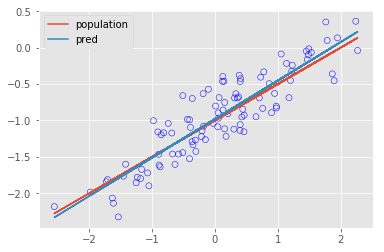

In [140]:
#### f) draw regression line for model and population line
plt.scatter(x, y, facecolor = "None", edgecolor = "b")

plt.plot(x, -1 + 0.5 * x, label = "population")
plt.plot(x, result.params[0] + result.params[1] * x, label = "pred")

plt.legend()
plt.show()

In [142]:
# (g) fit polynomial regression using x^2 
X = sm.add_constant(x)
# create new design matrix with x^2 column
x_squared = x**2
X = np.concatenate((X,x_squared.reshape(len(x),1)),axis=1)

quadratic_model = sm.OLS(y,X)
quadratic_est = quadratic_model.fit()
print(quadratic_est.summary())
print("\nThe RSE is ", (quadratic_est.ssr/(len(x)-X.shape[1]-1))**0.5)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     210.2
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           5.44e-36
Time:                        21:07:16   Log-Likelihood:                -5.6904
No. Observations:                 100   AIC:                             17.38
Df Residuals:                      97   BIC:                             25.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9643      0.033    -29.173      0.0

Notice that the R-squared improved slightly (it always will) but the RSE increased. The RSE accounts for the added degrees of freedom. In the quadratic model we have added an extra degree of freedom and this causes an increase in the residual error even though the RSS has decreased. Also note the p-value indicates that the coeffecient of the squared term is not significant.

## Examine Error Term Variance on Confidence Interval

In [153]:
# make a model with lower variance in the error term

np.random.seed(0)
x = np.random.randn(100)

# create a noise term eps of samples drawn from N(0,0.1)
eps_low = 0.1*np.random.randn(100)

# create a response variable y
y_low = -1 + 0.5*x + eps_low

# Construct linear estimate for low variance error model
X = sm.add_constant(x)
model_low = sm.OLS(y_low,X)
est_low = model_low.fit()
print('With Var(epsilon) = 0.1, the confidence interval for beta is: \n', est_low.conf_int())

# create a noise term eps of samples drawn from N(0,0.1)
eps_high = 0.5*np.random.randn(100)
# create a response variable y
y_high = -1 + 0.5*x + eps_high
model_high = sm.OLS(y_high,X)
est_high = model_high.fit()
est_high.conf_int()
print('\nWith Var(epsilon) = 0.5, the confidence interval for beta is: \n', est_high.conf_int())

With Var(epsilon) = 0.1, the confidence interval for beta is: 
 [[-1.01313217 -0.97183721]
 [ 0.49101981  0.53191987]]

With Var(epsilon) = 0.5, the confidence interval for beta is: 
 [[-1.12707658 -0.93645563]
 [ 0.44154891  0.63034698]]


In the low error term variance model we have a very narrow confidence interval. In the original model we had wider confidence intervals. In the highest variance model we have the widest confidence intervals. Recall the confidence interval is: $\beta \pm t_{\alpha/2,n-2} \frac{SE}{\sqrt{n}}$ As SE increases (due to increased var(epsilon) the confidence interval widens.

### Exercise 3.14

<img src="../images/3.14.jpg">


In [173]:
#### a)  Generate data
np.random.seed(1)

x1 = np.random.rand(100)
x2 = 0.5 * x1 + np.random.rand(100)/ 10

y = 2 + 2 * x1 + 0.3 * x2 + np.random.rand(100)

#### Regression coefficients are 2, 2, 0.3

Correlation between x1 and x2: 

[[1.         0.97747398]
 [0.97747398 1.        ]]


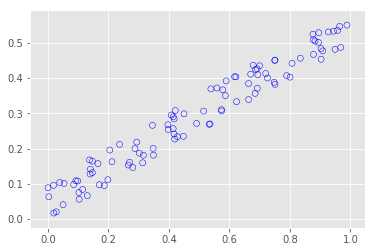

In [174]:
#### b) correlation between x1 and x2
print("Correlation between x1 and x2: \n")
print(np.corrcoef(x1, x2))

#### very high correlation

#### plot scatter plot
plt.scatter(x1, x2, facecolor = "None", edgecolor = "b")
plt.show()

In [175]:
#### c) least squares regression
X_new = np.column_stack((x1, x2))
X_new = sm.add_constant(X_new)

model = sm.OLS(y, X_new)

result = model.fit()
print("\nRSE: ", result.ssr/(len(X_new) - X_new.shape[0] -1))
result.summary()


RSE:  -7.610733602464601


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     246.2
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           9.92e-39
Time:                        21:25:20   Log-Likelihood:                -13.113
No. Observations:                 100   AIC:                             32.23
Df Residuals:                      97   BIC:                             40.04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5435      0.070     36.457      0.000       2.405       2.682
x1             1.6509      0.451      3.662      0.000       0.756       2.546
x2             0.9206      0.886      1.039      0.301      -0.838       2.679
==============================================================================
Omnibus:                       12.226   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                4.547
Skew:                          -0.215   Prob(JB):                        0.103
Kurtosis:                       2.048   Cond. No.                         41.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept $\beta_0 = 2.5435$ is significant and $\beta_1$ is also significant, so we reject the hypothesis that $\beta_0=0$ and the hypothesis that $\beta_1=0$ but we can't reject the hypothesis that $\beta_2 = 0$. Also notice the SE and confidence intervals for all three coeffecients are verly large.

In [176]:
#### d) least squares regression using x1 only
X_new = sm.add_constant(x1)

model = sm.OLS(y, X_new)

result = model.fit()
print("\nRSE: ", result.ssr/(len(X_new) - X_new.shape[0] -1))
result.summary()


RSE:  -7.695443298977404


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     490.8
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           6.09e-40
Time:                        21:28:20   Log-Likelihood:                -13.667
No. Observations:                 100   AIC:                             31.33
Df Residuals:                      98   BIC:                             36.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5893      0.054     47.883      0.000       2.482       2.697
x1             2.1088      0.095     22.155      0.000       1.920       2.298
==============================================================================
Omnibus:                       11.499   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                4.481
Skew:                          -0.224   Prob(JB):                        0.106
Kurtosis:                       2.065   Cond. No.                         4.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
#### e) least squares regression using x2 only
X_new = sm.add_constant(x2)

model = sm.OLS(y, X_new)

result = model.fit()
print("\nRSE: ", result.ssr/(len(X_new) - X_new.shape[0] -1))
result.summary()


RSE:  -8.662998433693998


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     425.1
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.04e-37
Time:                        21:29:23   Log-Likelihood:                -19.588
No. Observations:                 100   AIC:                             43.18
Df Residuals:                      98   BIC:                             48.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4213      0.065     37.229      0.000       2.292       2.550
x1             4.0923      0.198     20.617      0.000       3.698       4.486
==============================================================================
Omnibus:                        3.339   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.188   Jarque-Bera (JB):                2.402
Skew:                          -0.215   Prob(JB):                        0.301
Kurtosis:                       2.374   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In model 1, $y \sim x_1$, we find that the coeffecient is close to the true value and is now very significant. In model 2 $y \sim x_2$, we find that the coeffecient for $x_2$ is now very significant. 


Note there is no contradiction here. $x_1$ and $x_2$ are strongly correlated and each is related to $y$ independent of each other. Only $x_1 \,or\, x_2$ is needed to caputure the models systematic variance.  

## Fit Least Squares Regression with Possible High Leverage or Outlier

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     314.1
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.39e-43
Time:                        21:32:03   Log-Likelihood:                -14.558
No. Observations:                 101   AIC:                             35.12
Df Residuals:                      98   BIC:                             42.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6267      0.055     48.009      0.0

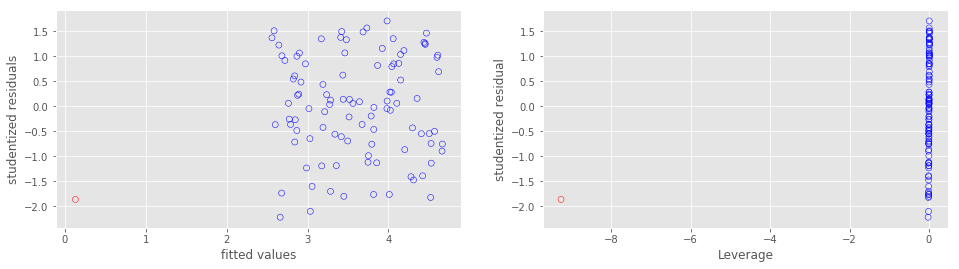

In [179]:
# append new data points onto x1 and x2 and y
df = pd.DataFrame(np.column_stack((y,x1,x2)), columns=['y','x1','x2'] )
df.loc[len(df)] = [0.1, 0.8, 6]

# create design matrix, model and fit for multiple regression
X = sm.add_constant(df[['x1','x2']])
model = sm.OLS(df.y, X)
estimate = model.fit()

# print the betas and the p values
print(estimate.summary())

# Obtain the residuals, studentized residuals and the leverages
fitted_values = estimate.fittedvalues.values
residuals = estimate.resid.values
studentized_residuals = OLSInfluence(estimate).resid_studentized_internal
leverages = OLSInfluence(estimate).influence

# Plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,4))

# Studentized Residuals
ax1.scatter(fitted_values[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b');

# Plot the possible Outlier in red
ax1.scatter(fitted_values[-1], studentized_residuals[-1], facecolors='none', edgecolors='r');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('studentized residuals');

# Leverages
ax2.scatter(leverages[:-1], studentized_residuals[:-1], facecolors='none', edgecolors='b');

# plot the possible high leverager in red
ax2.scatter(leverages[-1], studentized_residuals[-1], facecolors='none', edgecolors='r');
ax2.set_xlabel('Leverage');
ax2.set_ylabel('studentized residual');

- Several very important things to note. 

    - When we added the possible outlier/leverage point, all the coeffecients became significant. This shows how a single point can cause havoc when multi-collinearity is present. 
    - The coeffecient estimates are wildly different than in any of the previous models. 
    - Secondly, we confirmed that the point we added was indeed a high leverage point though not an outlier. In fact on different runs of this code different coeffecients of $\beta$ occur.

### Exercise 3.15

<img src="../images/3.15.jpg">


## Load Dataset

In [182]:
# Load Boston housing data set
boston = load_boston()

# remind ourselves of what the variables are.
print(boston['DESCR'])

#Transform the data into a dataframe for analysis¶

# combine the predictors and responses for a dataframe
predictors = boston.data
response = boston.target
boston_data = np.column_stack([predictors,response])

# now get the column names of the data frame
col_names = np.append(boston.feature_names, 'MEDV')

# create the data frame
boston_df = pd.DataFrame(boston_data, columns = col_names)
boston_df.head()

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Univariate Linear Regressions

We will regress 'CRIM' response onto each of the predictors and save the coeffecients and the p-values from each regression. 

In [183]:
# Perform OLS for each predictor with 'CRIM' as response variable
estimates = defaultdict(list)
for predictor in list(boston_df.drop('CRIM',axis=1)):
    # add constant term
    X = sm.add_constant(boston_df[predictor])
    
    # create the estimate
    estimate=sm.OLS(boston_df['CRIM'],X).fit()
    
    # add the estimate obj to the estimates defaultdict
    estimates[predictor] = estimate
    # make a table of the coeffecients and p-values
    print("{0:8s}: [beta_0, beta_1] = [{1:5.2f},{2:6.2f}]:    p-value= {3:10.6f}".format(predictor, estimate.params[0], estimate.params[1], estimate.pvalues[1]))

ZN      : [beta_0, beta_1] = [ 4.43, -0.07]:    p-value=   0.000006
INDUS   : [beta_0, beta_1] = [-2.05,  0.51]:    p-value=   0.000000
CHAS    : [beta_0, beta_1] = [ 3.72, -1.87]:    p-value=   0.214344
NOX     : [beta_0, beta_1] = [-13.59, 30.98]:    p-value=   0.000000
RM      : [beta_0, beta_1] = [20.51, -2.69]:    p-value=   0.000001
AGE     : [beta_0, beta_1] = [-3.75,  0.11]:    p-value=   0.000000
DIS     : [beta_0, beta_1] = [ 9.45, -1.54]:    p-value=   0.000000
RAD     : [beta_0, beta_1] = [-2.27,  0.61]:    p-value=   0.000000
TAX     : [beta_0, beta_1] = [-8.47,  0.03]:    p-value=   0.000000
PTRATIO : [beta_0, beta_1] = [-17.53,  1.14]:    p-value=   0.000000
B       : [beta_0, beta_1] = [16.27, -0.04]:    p-value=   0.000000
LSTAT   : [beta_0, beta_1] = [-3.29,  0.54]:    p-value=   0.000000
MEDV    : [beta_0, beta_1] = [11.72, -0.36]:    p-value=   0.000000


#### All the predictors except for CHAS (river bounding properties) are significant when computed individually. 

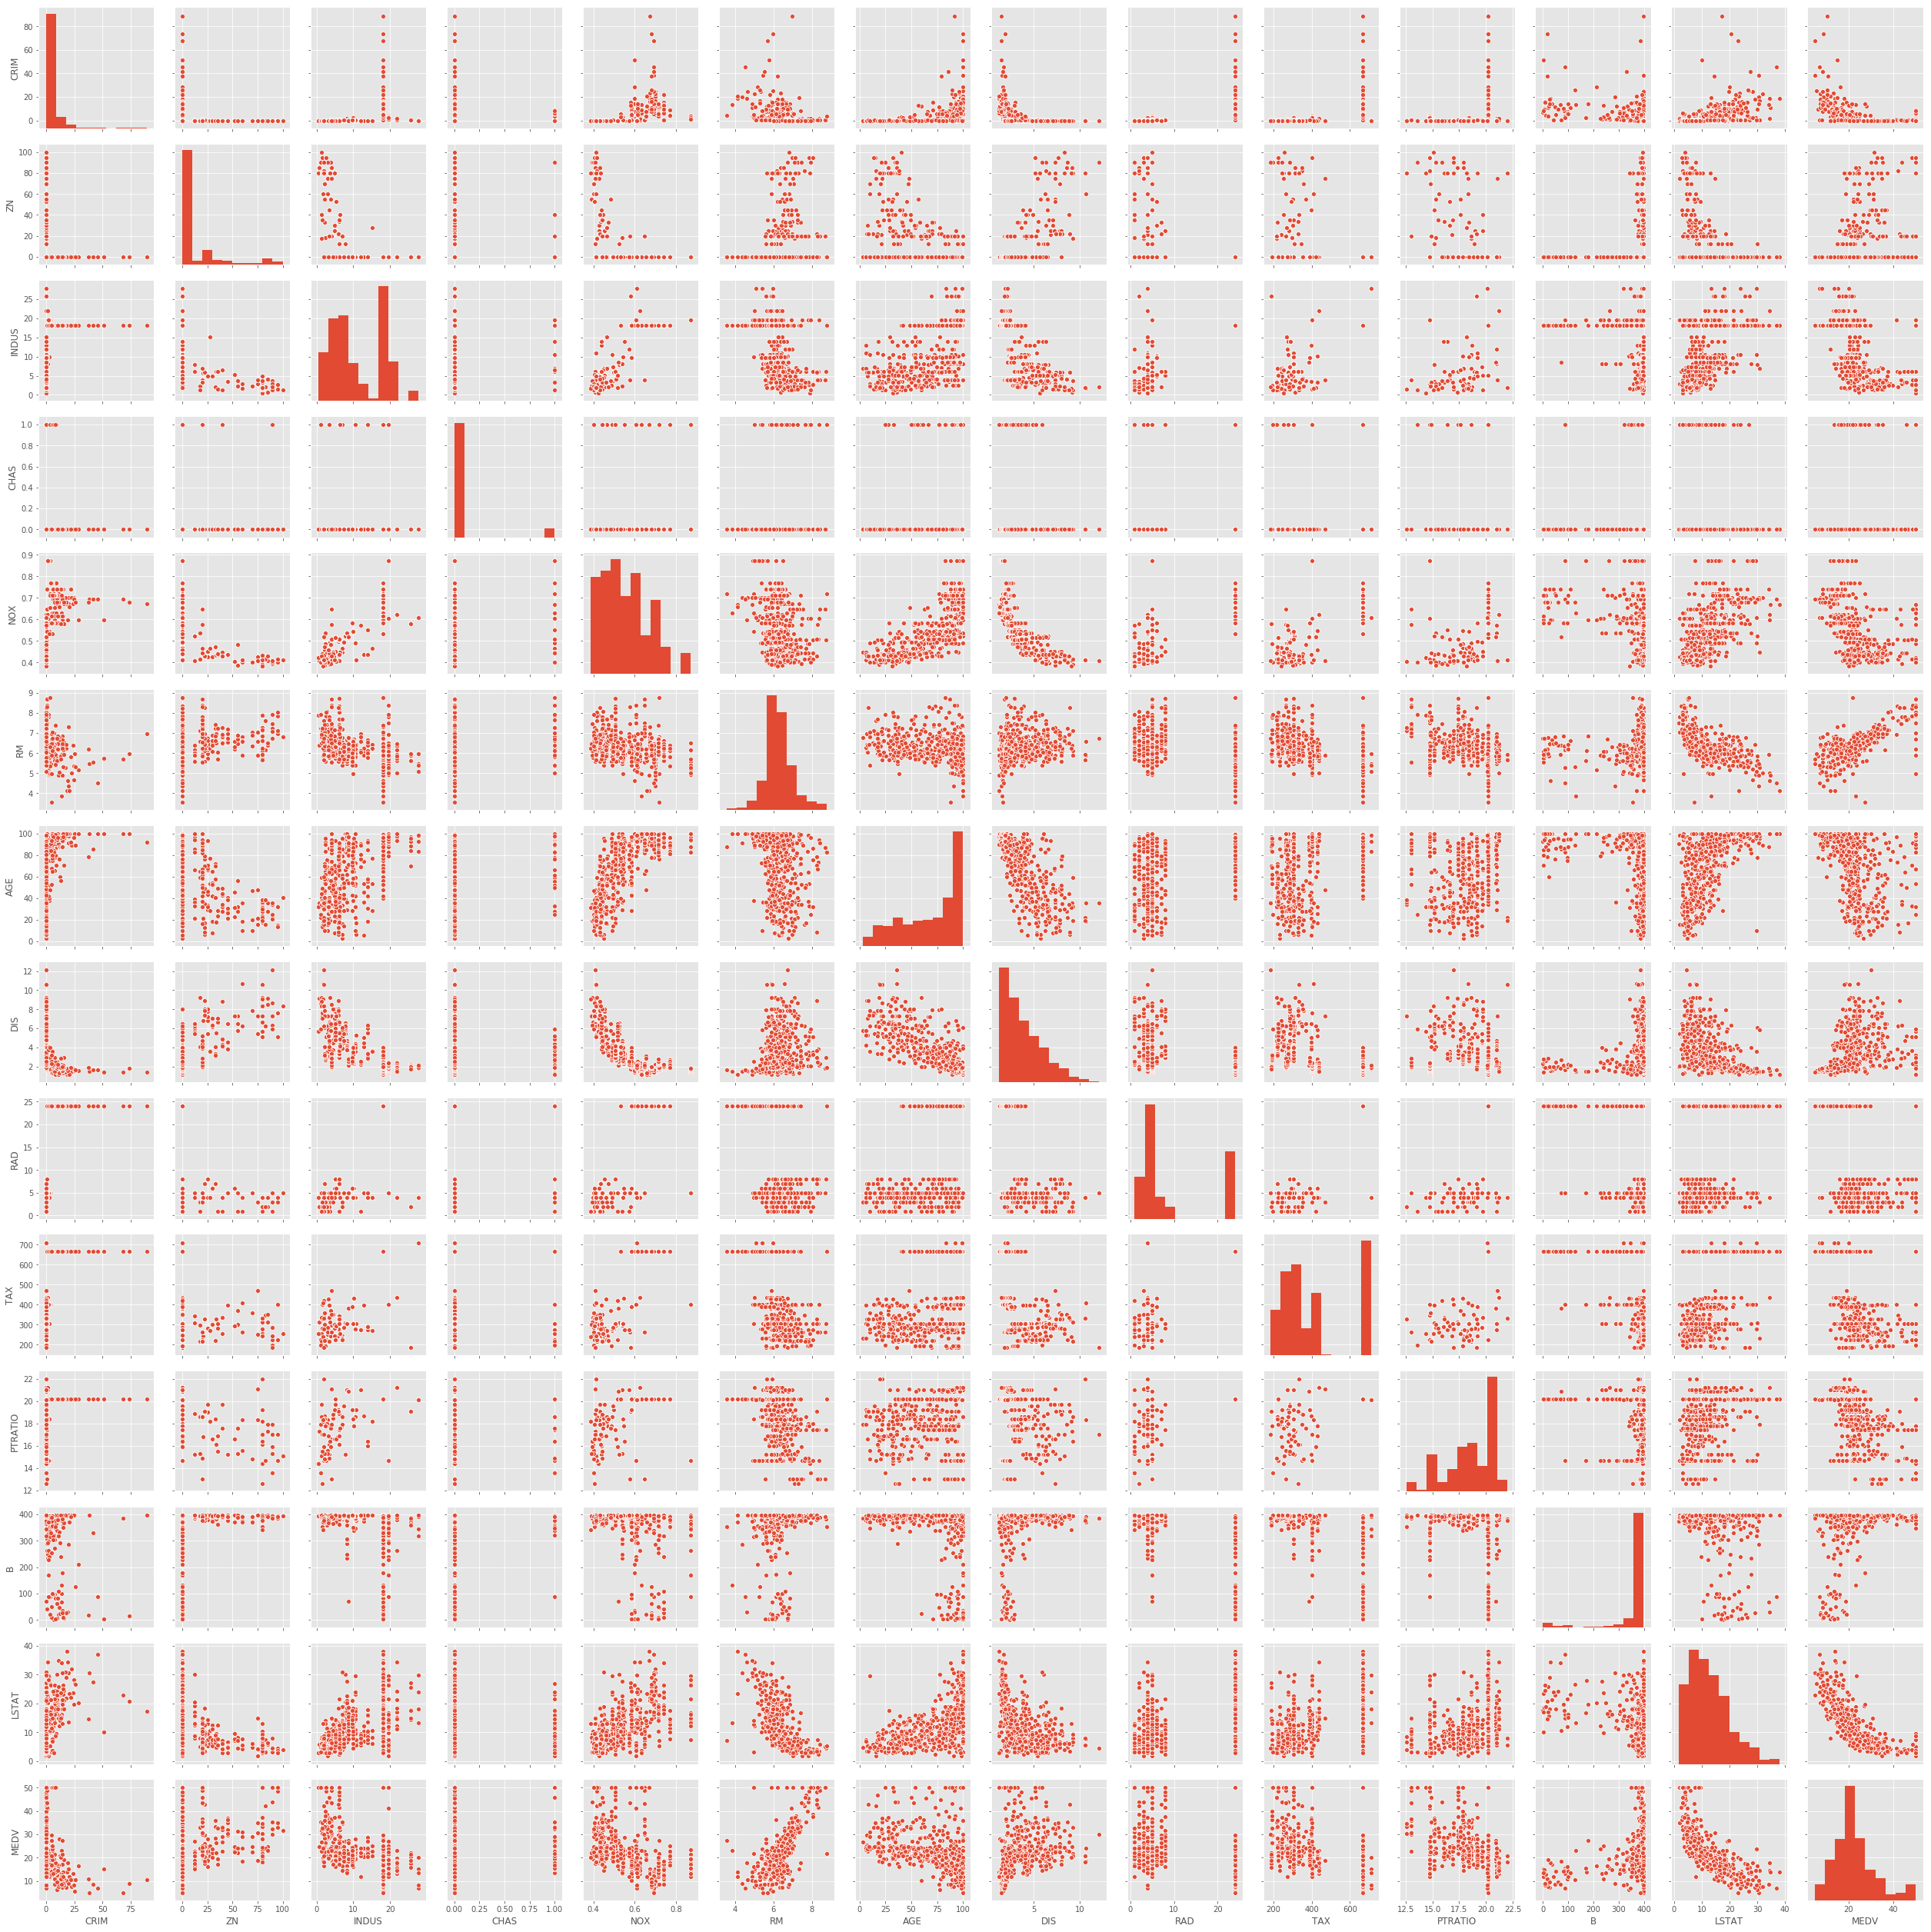

In [193]:
# Scatter-plot to see the predictor-response relationships
# We scatter-plot all because some of the predictors could be highly correlated and we should see that.
# scatter_matrix(boston_df,figsize=(16,14),alpha=0.5);
sns.pairplot(data= boston_df)
plt.show()

## Multiple Linear Regression

In [194]:
# Create a design matrix consisting of all the predictors
X = sm.add_constant(boston_df.iloc[:,1:])
y = boston_df.CRIM

estimate = sm.OLS(y,X).fit()
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     30.73
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.04e-55
Time:                        21:42:43   Log-Likelihood:                -1655.7
No. Observations:                 506   AIC:                             3339.
Df Residuals:                     492   BIC:                             3399.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.4184      7.270      2.396      0.0

- We can now reject the null hypothesis $\beta_i=0$ for ZN, NOX, DIS, RAD and MEDV predictors. 

- The reason many of the predictors are not significant in the multiple regression is because some of the predictors are correlated with each other. 

- When we do multiple regression we determine a single coeffecient while holding all other predictors constant. Thus predictors that are correlated are revealed to be insignificant.

## Compare Univariate to Multivariate Coeffecients

In [195]:
# get the parameters of the multiple linear regression coeffecients (ignoring the constant)
ml_regression = estimate.params[1:]

# get the univariate regression coeffecients
params_dict = defaultdict(float)
# for each predictor extract the params[1] (beta_1) element from the estimate obj
for predictor in estimates.keys():
    params_dict[predictor] = estimates[predictor].params[1]

# convert to a Series to match ml_regression
univ_regression = pd.Series(params_dict)

regression_df = pd.concat([univ_regression, ml_regression],axis=1)
print(regression_df)

                 0          1
ZN       -0.073521   0.044919
INDUS     0.506847  -0.061576
CHAS     -1.871545  -0.741435
NOX      30.975259 -10.645500
RM       -2.691045   0.381070
AGE       0.107131   0.002011
DIS      -1.542831  -0.994992
RAD       0.614137   0.588838
TAX       0.029563  -0.003746
PTRATIO   1.144613  -0.278731
B        -0.035535  -0.006855
LSTAT     0.544406   0.121269
MEDV     -0.360647  -0.199218


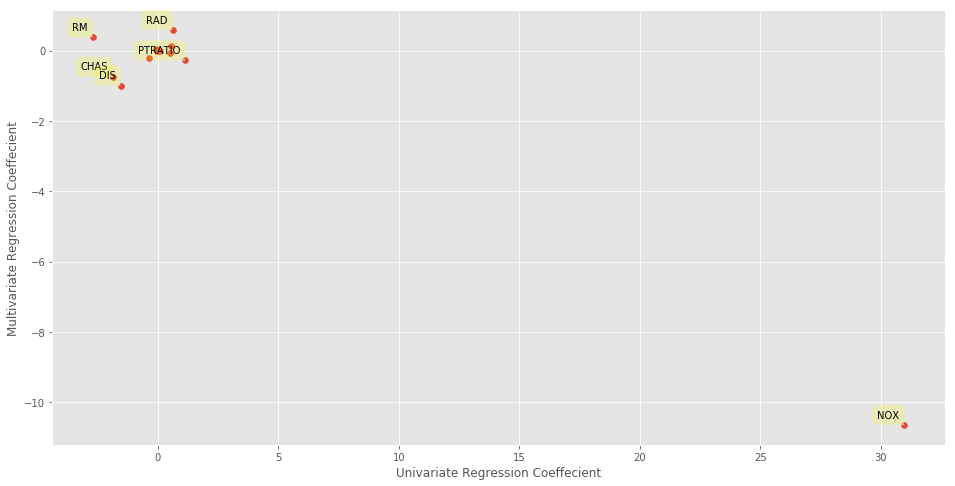

In [196]:
fig,ax = plt.subplots(figsize = (16,8))
ax.scatter(regression_df[0], regression_df[1]);

for label, x, y in zip(regression_df.index, regression_df[0].values, regression_df[1].values):
    if label in ['RM','CHAS','DIS', 'RAD', 'PTRATIO', 'NOX']:
        plt.annotate(label, xy = (x, y), xytext = (-5, 5), textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.2),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

ax.set_xlabel('Univariate Regression Coeffecient');
ax.set_ylabel('Multivariate Regression Coeffecient');

## Perform Cubic Regressions

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     119.2
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           2.65e-58
Time:                        21:45:48   Log-Likelihood:                -1670.0
No. Observations:                 506   AIC:                             3348.
Df Residuals:                     502   BIC:                             3365.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       52.9386      3.366     15.725   

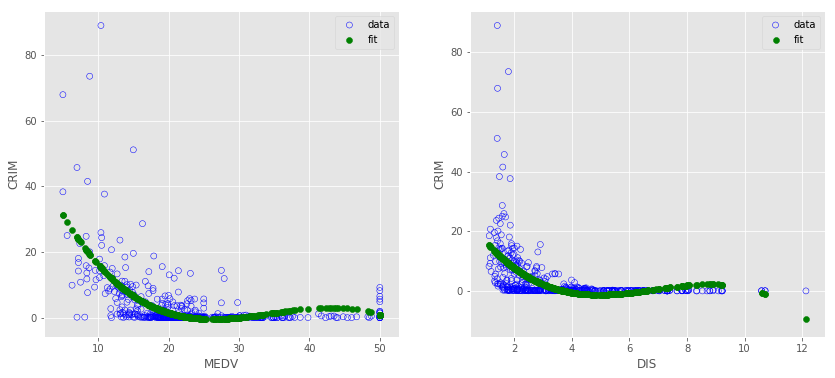

In [197]:
# We will fit a cubic regression for CRIM regressed onto the significant predictors DIS, RAD, MEDV
model_medv = smf.ols('CRIM ~ MEDV + I(MEDV**2)+I(MEDV**3)', data = boston_df)
estimate_medv = model_medv.fit()
print(estimate_medv.summary())

model_dis = smf.ols('CRIM ~ DIS + I(DIS**2)+I(DIS**3)', data = boston_df)
estimate_dis = model_dis.fit()
print(estimate_dis.summary())

model_rad = smf.ols('CRIM ~ RAD + I(RAD**2)+I(RAD**3)', data = boston_df)
estimate_rad = model_dis.fit()
print(estimate_rad.summary())

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

# Plot 'CRIM', 'MEDV' 
ax1.scatter(boston_df.MEDV.values,boston_df.CRIM.values, facecolor = 'none', edgecolor = 'b', label = 'data');
ax1.scatter(boston_df.MEDV.values, estimate_medv.fittedvalues, facecolor = 'g', label='fit');
ax1.set_xlabel('MEDV');
ax1.set_ylabel('CRIM');
ax1.legend(loc='best');

# Plot 'CRIM', 'DIS'
ax2.scatter(boston_df.DIS.values,boston_df.CRIM.values, facecolor = 'none', edgecolor = 'b', label = 'data');
ax2.scatter(boston_df.DIS.values, estimate_dis.fittedvalues, facecolor = 'g', label='fit');
ax2.set_xlabel('DIS');
ax2.set_ylabel('CRIM');
ax2.legend(loc='best');

There is evidence of non-linear associations between predictor and responses because the quadratic and cubic terms are significant in these models.